In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# load and view data
df = pd.read_excel('newyork-airbnb.xlsx')
df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,2015-08-31,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,2015-08-31,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,2015-08-31,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,2015-08-31,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


In [6]:
# Check the data information
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30478 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30478 non-null  object        
 3   Neighbourhood               30478 non-null  object        
 4   Property Type               30475 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30478 non-null  object        
 7   Zipcode                     30344 non-null  float64       
 8   Beds                        30393 non-null  float64       
 9   Number of Records           30478 non-null  int64         
 10  Number Of Reviews           30478 non-null  int64         
 11  Price                       30478 non-null  int64     

In [7]:
# check for nulls in the data
df.isnull().values.any()

True

In [8]:
# show columns with null
df.isnull().sum()

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

In [9]:
# check total count of nulls
df.isnull().sum().sum()

16871

In [13]:
#drop all nulls
df = df.dropna()

In [15]:
# check if all nulls have been dropped
df.isnull().sum().sum()

0

In [16]:
# check for duplicate rows
dup_rows = df[df.duplicated()]
print ("Number of Duplicated Rows:", dup_rows.shape)

Number of Duplicated Rows: (3, 13)


In [17]:
# Remove the 3 Duplicated Rows
df = df.drop_duplicates()

In [18]:
# check again if all duplicate rows have been removed
dup_rows = df[df.duplicated()]
print ("Number of Duplicated Rows:", dup_rows.shape)

Number of Duplicated Rows: (0, 13)


In [20]:
df.dtypes

Host Id                                int64
Host Since                    datetime64[ns]
Name                                  object
Neighbourhood                         object
Property Type                         object
Review Scores Rating (bin)           float64
Room Type                             object
Zipcode                              float64
Beds                                 float64
Number of Records                      int64
Number Of Reviews                      int64
Price                                  int64
Review Scores Rating                 float64
dtype: object

In [ ]:
# drop column Review Scores Rating (bin) 
df = df.drop(columns=['Review Scores Rating (bin)'])
df

In [24]:
df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,10036.0,3.0,1,39,549,96.0
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,Private room,11201.0,1.0,1,80,90,94.0
8,2339,2008-08-20,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,Entire home/apt,10009.0,2.0,1,95,270,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30332,42349033,2015-08-24,Cute cozy studio in east village,Manhattan,Apartment,Entire home/apt,10003.0,1.0,1,1,90,100.0
30347,42430249,2015-08-24,Room in new spacious loft!,Brooklyn,Apartment,Private room,11222.0,1.0,1,1,65,80.0
30378,42518458,2015-08-25,Williamsburg Luxury Loft!⭐️Bed Top,Brooklyn,Loft,Shared room,11206.0,1.0,1,1,55,100.0
30404,42697124,2015-08-27,"Cute, Clean Room- East Williamsburg",Brooklyn,Apartment,Private room,11206.0,1.0,1,1,60,100.0


In [25]:
# drop column Review Scores Rating (bin) & Number of Records
df = df.drop(columns=['Number of Records'])
df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number Of Reviews,Price,Review Scores Rating
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,10036.0,3.0,39,549,96.0
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,Entire home/apt,11222.0,1.0,4,149,100.0
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,Entire home/apt,10004.0,1.0,9,250,100.0
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,Private room,11201.0,1.0,80,90,94.0
8,2339,2008-08-20,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,Entire home/apt,10009.0,2.0,95,270,90.0
...,...,...,...,...,...,...,...,...,...,...,...
30332,42349033,2015-08-24,Cute cozy studio in east village,Manhattan,Apartment,Entire home/apt,10003.0,1.0,1,90,100.0
30347,42430249,2015-08-24,Room in new spacious loft!,Brooklyn,Apartment,Private room,11222.0,1.0,1,65,80.0
30378,42518458,2015-08-25,Williamsburg Luxury Loft!⭐️Bed Top,Brooklyn,Loft,Shared room,11206.0,1.0,1,55,100.0
30404,42697124,2015-08-27,"Cute, Clean Room- East Williamsburg",Brooklyn,Apartment,Private room,11206.0,1.0,1,60,100.0


In [26]:
# Rename Columns below:
# Number Of Reviews to Review Count, Review Scores Rating to Review Score

df = df.rename(columns={"Number Of Reviews":"Review Count","Review Scores Rating":"Review Score"})
df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Review Count,Price,Review Score
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,10036.0,3.0,39,549,96.0
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,Entire home/apt,11222.0,1.0,4,149,100.0
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,Entire home/apt,10004.0,1.0,9,250,100.0
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,Private room,11201.0,1.0,80,90,94.0
8,2339,2008-08-20,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,Entire home/apt,10009.0,2.0,95,270,90.0
...,...,...,...,...,...,...,...,...,...,...,...
30332,42349033,2015-08-24,Cute cozy studio in east village,Manhattan,Apartment,Entire home/apt,10003.0,1.0,1,90,100.0
30347,42430249,2015-08-24,Room in new spacious loft!,Brooklyn,Apartment,Private room,11222.0,1.0,1,65,80.0
30378,42518458,2015-08-25,Williamsburg Luxury Loft!⭐️Bed Top,Brooklyn,Loft,Shared room,11206.0,1.0,1,55,100.0
30404,42697124,2015-08-27,"Cute, Clean Room- East Williamsburg",Brooklyn,Apartment,Private room,11206.0,1.0,1,60,100.0


In [38]:
# sort dataset by price in descending order
df = df.sort_values(by=['Price'], inplace=False, ascending=False)
df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Review Count,Price,Review Score
23927,23248648,2014-11-02,NO LONGER BOOKING RESERVATIONS,Manhattan,Apartment,Entire home/apt,10025.0,2.0,21,10000,95.0
1275,213266,2010-08-26,Beautiful 1 Bedroom in Nolita/Soho,Manhattan,Apartment,Entire home/apt,10012.0,2.0,2,5000,76.0
7550,2675644,2012-06-18,Turn of the Century Film Location,Staten Island,House,Entire home/apt,10301.0,12.0,1,5000,40.0
4003,1177497,2011-09-18,Photography Location,Brooklyn,House,Entire home/apt,11205.0,5.0,3,4500,100.0
27088,31433828,2015-04-18,1.5 month lease near Lincoln Center,Manhattan,Apartment,Entire home/apt,10023.0,1.0,1,3500,100.0
...,...,...,...,...,...,...,...,...,...,...,...
15228,8552208,2013-08-31,Lounge in Lefferts Garden for $24,Brooklyn,Apartment,Shared room,11213.0,1.0,15,24,84.0
19273,14381346,2014-04-16,Comfy Sofa available in the Bronx,Bronx,House,Shared room,10462.0,1.0,41,22,89.0
25916,27187487,2015-02-03,Airbed in living room/kitchen,Bronx,Apartment,Shared room,10458.0,1.0,1,21,80.0
9793,3991870,2012-10-27,1 Couch 8 min from Manhattan J\M\Z,Brooklyn,Apartment,Shared room,11206.0,1.0,17,20,81.0


In [48]:
df.corr(method='pearson')

,Host Id,Zipcode,Beds,Review Count,Price,Review Score
Host Id,1.000000,-0.022813,0.010333,-0.267741,-0.050413,-0.053876
Zipcode,-0.022813,1.000000,0.034784,-0.023801,-0.202778,0.022230
Beds,0.010333,0.034784,1.000000,0.035503,0.367739,-0.070257
Review Count,-0.267741,-0.023801,0.035503,1.000000,-0.026976,-0.014409
Price,-0.050413,-0.202778,0.367739,-0.026976,1.000000,0.060453
Review Score,-0.053876,0.022230,-0.070257,-0.014409,0.060453,1.000000


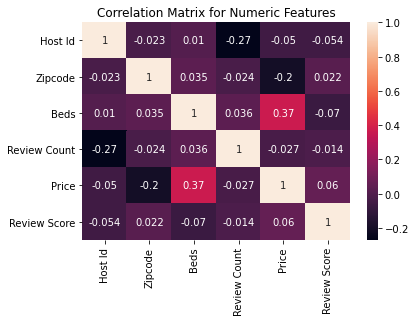

In [49]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [60]:
# Sum of Prices of Property Group By Property Type
df.groupby(['Property Type'])["Price"].sum()

Property Type
Apartment          3004651
Bed & Breakfast      14021
Boat                   920
Bungalow               431
Cabin                  330
Camper/RV              400
Castle                 150
Chalet                  99
Condominium          11579
Dorm                  1382
House               227686
Hut                     50
Lighthouse              39
Loft                120200
Other                 5010
Townhouse            17783
Treehouse              503
Villa                  924
Name: Price, dtype: int64

In [67]:
# All Observations where Property Type is Apartment
Apartments = df.loc[df['Property Type'] == "Apartment"]
Apartments

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Review Count,Price,Review Score
23927,23248648,2014-11-02,NO LONGER BOOKING RESERVATIONS,Manhattan,Apartment,Entire home/apt,10025.0,2.0,21,10000,95.0
1275,213266,2010-08-26,Beautiful 1 Bedroom in Nolita/Soho,Manhattan,Apartment,Entire home/apt,10012.0,2.0,2,5000,76.0
27088,31433828,2015-04-18,1.5 month lease near Lincoln Center,Manhattan,Apartment,Entire home/apt,10023.0,1.0,1,3500,100.0
28733,36538690,2015-06-23,Park Slope Brooklyn for July,Brooklyn,Apartment,Entire home/apt,11215.0,3.0,1,3100,100.0
3482,904192,2011-08-01,"FAMOUS SOHO ""MERCER ST."" PENTHOUSE!",Manhattan,Apartment,Entire home/apt,10012.0,6.0,17,2750,95.0
...,...,...,...,...,...,...,...,...,...,...,...
29089,37621324,2015-07-05,Room with lots of light in Bushwick,Queens,Apartment,Private room,11385.0,1.0,1,25,100.0
15230,8552208,2013-08-31,SightSee NYC for only $24 a Night,Brooklyn,Apartment,Shared room,11213.0,1.0,3,24,87.0
15228,8552208,2013-08-31,Lounge in Lefferts Garden for $24,Brooklyn,Apartment,Shared room,11213.0,1.0,15,24,84.0
25916,27187487,2015-02-03,Airbed in living room/kitchen,Bronx,Apartment,Shared room,10458.0,1.0,1,21,80.0


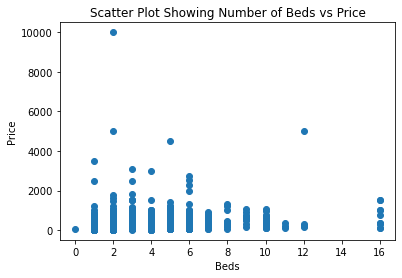

In [65]:
x = df['Beds']
y = df['Price']
plt.scatter(x,y)
plt.xlabel('Beds')
plt.ylabel('Price')
plt.title('Scatter Plot Showing Number of Beds vs Price')
plt.show()


In [69]:
# Export data For Further Visualization
df.to_csv('PowerBI Data.csv', index=False)
df.to_csv('Tableau Data.csv', index=False)